In [1]:
using Gadfly
using Ensemble
using TestEnsembleGibbs

 in depwarn at ./deprecated.jl:62
 in oldstyle_vcat_warning at ./abstractarray.jl:28
 in vect at abstractarray.jl:31
 in include at ./boot.jl:253
 in include_from_node1 at ./loading.jl:133
 in include at ./boot.jl:253
 in include_from_node1 at ./loading.jl:133
 in reload_path at ./loading.jl:157
 in _require at ./loading.jl:69
 in require at ./loading.jl:55
 in include at ./boot.jl:253
 in include_from_node1 at ./loading.jl:133
 in reload_path at ./loading.jl:157
 in _require at ./loading.jl:69
 in require at ./loading.jl:55
 in include at ./boot.jl:253
 in include_from_node1 at ./loading.jl:133
 in include at ./boot.jl:253
 in include_from_node1 at ./loading.jl:133
 in reload_path at ./loading.jl:157
 in _require at ./loading.jl:69
 in require at ./loading.jl:52
 in include_string at loading.jl:99
 in execute_request_0x535c5df2 at /Users/farr/.julia/v0.4/IJulia/src/execute_request.jl:157
 in eventloop at /Users/farr/.julia/v0.4/IJulia/src/IJulia.jl:123
 in anonymous at task.jl:365
whi

In [3]:
xsdet, xsndet = TestEnsembleGibbs.draw()

([4.6681,3.43835,3.38247,3.52618,3.62907,5.47356,3.41307,3.32056,3.66363,4.61338  …  3.13978,2.96054,3.78806,4.0003,4.00329,2.263,3.76414,4.65673,5.64178,3.60445],[2.25497,2.50522,2.62779,2.12328,2.04865,2.53214,2.45968,3.55652,2.56782,2.86759  …  2.2455,2.55403,1.71404,3.01864,2.75498,2.95168,2.09461,1.93987,3.33274,2.99459])

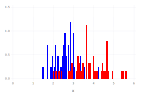

In [4]:
plot(layer(x=xsdet, Geom.histogram(density=true), Theme(default_color=color("red"))),
layer(x=xsndet, Geom.histogram(density=true), Theme(default_color=color("blue"))))

In [5]:
lnprob = TestEnsembleGibbs.make_lnprob(xsdet)

lnprob (generic function with 1 method)

In [6]:
ps = zeros(3, 100)
for j in 1:100
    for i in 1:3
        ps[i,j] = TestEnsembleGibbs.ptrue[i] + 1e-3*randn()
    end
end
gs = [TestEnsembleGibbs.draw(exp(ps[1,i]), ps[2,i], exp(ps[3,i]))[2] for i in 1:100]

100-element Array{Any,1}:
 [2.29016,2.29014,1.77016,2.7923,2.36575,3.05538,3.27118,1.5121,3.12897,2.99883  …  1.89975,2.02533,2.42971,2.22151,1.68267,2.94696,2.11522,2.82203,2.74444,3.24662]  
 [2.86158,1.23986,2.49861,2.44078,2.98988,2.30661,2.34794,1.81269,2.94488,2.47811  …  2.81573,1.713,2.60186,2.25644,1.84691,2.43017,2.06092,2.12732,2.63035,2.62695]  
 [2.20421,2.12901,2.27627,2.17681,2.47295,2.63883,1.98827,2.21927,1.47511,3.04137  …  1.99295,2.11668,1.99035,2.47963,1.68617,2.54022,2.52179,2.10344,2.96609,2.95432]
 [1.98865,2.33942,2.32745,2.30744,2.0407,3.39038,3.26307,2.89245,3.86984,2.33028  …  3.16155,2.70668,2.47543,1.97794,2.28604,2.69104,2.71163,2.42928,2.57593,2.17686] 
 [1.66351,3.85662,2.8156,2.66899,2.6884,2.74563,1.90575,2.56811,2.35812,2.20287  …  2.64624,2.33443,2.65418,2.08647,1.11554,1.84809,2.84904,3.23299,2.52658,2.20487]  
 [1.46731,1.96771,1.48457,2.42811,1.91093,2.07809,2.3939,1.76959,2.74635,2.47856  …  3.00499,1.96015,3.53513,2.9977,2.85759,1.89036,2.60629

In [7]:
lnprobs = EnsembleGibbs.lnprobs(ps, gs, lnprob)

100-element Array{Float64,1}:
 186.286
 201.494
 209.156
 206.731
 213.427
 170.076
 164.197
 248.296
 195.191
 167.579
 189.933
 184.769
 210.317
   ⋮    
 200.067
 191.219
 214.5  
 176.601
 216.6  
 199.135
 174.394
 197.62 
 150.163
 163.565
 214.65 
 203.449

In [8]:
for i in 1:100
    ps, gs, lnprobs = EnsembleGibbs.update(ps, gs, lnprobs, lnprob, TestEnsembleGibbs.gibbsupdate)
end

In [11]:
pmean = zeros(3)
for i in 1:size(ps, 2)
    for j in 1:3
        pmean[j] += ps[j,i]
    end
end
pmean /= size(ps,2)
pmean

3-element Array{Float64,1}:
  4.61738
  1.09808
 -1.16934

In [12]:
psig = zeros(3)
for i in 1:size(ps, 2)
    for j in 1:3
        psig[j] += (ps[j,i]-pmean[j])*(ps[j,i]-pmean[j])
    end
end
psig /= size(ps,2)
psig = sqrt(psig)

3-element Array{Float64,1}:
 0.200001 
 0.0846498
 0.164891 

In [14]:
(pmean[1]-TestEnsembleGibbs.ptrue[1])/psig[1], (pmean[2]-TestEnsembleGibbs.ptrue[2])/psig[2], (pmean[3]-TestEnsembleGibbs.ptrue[3])/psig[3]

(0.06105750203358407,-0.006275798238943626,-0.42892890574434417)

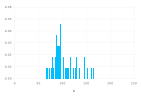

In [15]:
plot(x=exp(ps[1,:]), Geom.histogram(density=true))

In [16]:
pts, gibs, lnps = EnsembleGibbs.run_mcmc(ps, gs, lnprobs, lnprob, TestEnsembleGibbs.gibbsupdate, 1000; thin=10)

(
3x100x100 Array{Float64,3}:
[:, :, 1] =
  4.41393   5.02571    4.50538   4.3791   …   4.54519   4.34381   4.55749
  1.14518   0.946703   1.15204   1.14148      1.17788   1.12843   1.18152
 -1.2072   -0.852721  -1.21106  -1.4108      -1.35022  -1.21935  -1.28076

[:, :, 2] =
  4.63324   4.86986   4.49557   4.33074  …   4.85456   4.34453   4.63421
  1.10829   1.00557   1.0568    1.16957      1.14166   1.16293   1.1649 
 -1.20661  -0.96999  -1.0761   -1.4695      -1.34011  -1.30297  -1.23909

[:, :, 3] =
  4.62043   4.77085   4.76284    4.37134  …   4.66364   4.36439   4.5469 
  1.11583   1.03004   0.944169   1.11287      1.17425   1.13918   1.1818 
 -1.19321  -1.03518  -0.930472  -1.42973     -1.43813  -1.27339  -1.22556

...

[:, :, 98] =
  4.58807   4.37032   4.38434   4.64853  …   4.79794   4.75817    4.34144
  1.16376   1.20241   1.2043    1.08848      1.01405   0.997392   1.12691
 -1.35646  -1.32939  -1.3245   -1.2297      -1.12502  -1.05606   -1.09832

[:, :, 99] =
  4.65418   4.

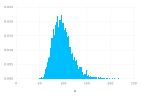

In [17]:
plot(x=exp(pts[1,:,:]), Geom.histogram(density=true))

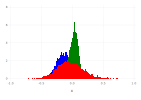

In [18]:
colors = [color("red"), color("green"), color("blue")]
layers = [layer(x=pts[i,:,:]-TestEnsembleGibbs.ptrue[i], Geom.histogram(density=true), Theme(default_color=colors[i])) for i in 1:3]
plot(layers...)

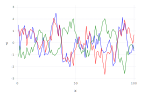

In [19]:
layers = Any[nothing for i in 1:3]
colors = [color("red"), color("green"), color("blue")]
for i in 1:3
    means = zeros(100)
    for j in 1:100
        means[j] = mean(pts[i,:,j])
    end
    mu = mean(means)
    sigma = std(means)
    layers[i] = layer(x=collect(1:100), y=(means-mu)/sigma, Geom.line, Theme(default_color=colors[i]))
end
plot(layers...)